# K Nearest Neighbors Project 

## Importing Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Get the Data

In [11]:
df = pd.read_csv('KNN_Project_Data')

In [12]:
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

# EDA

Since this data is artificial, large pairplot with seaborn was done.

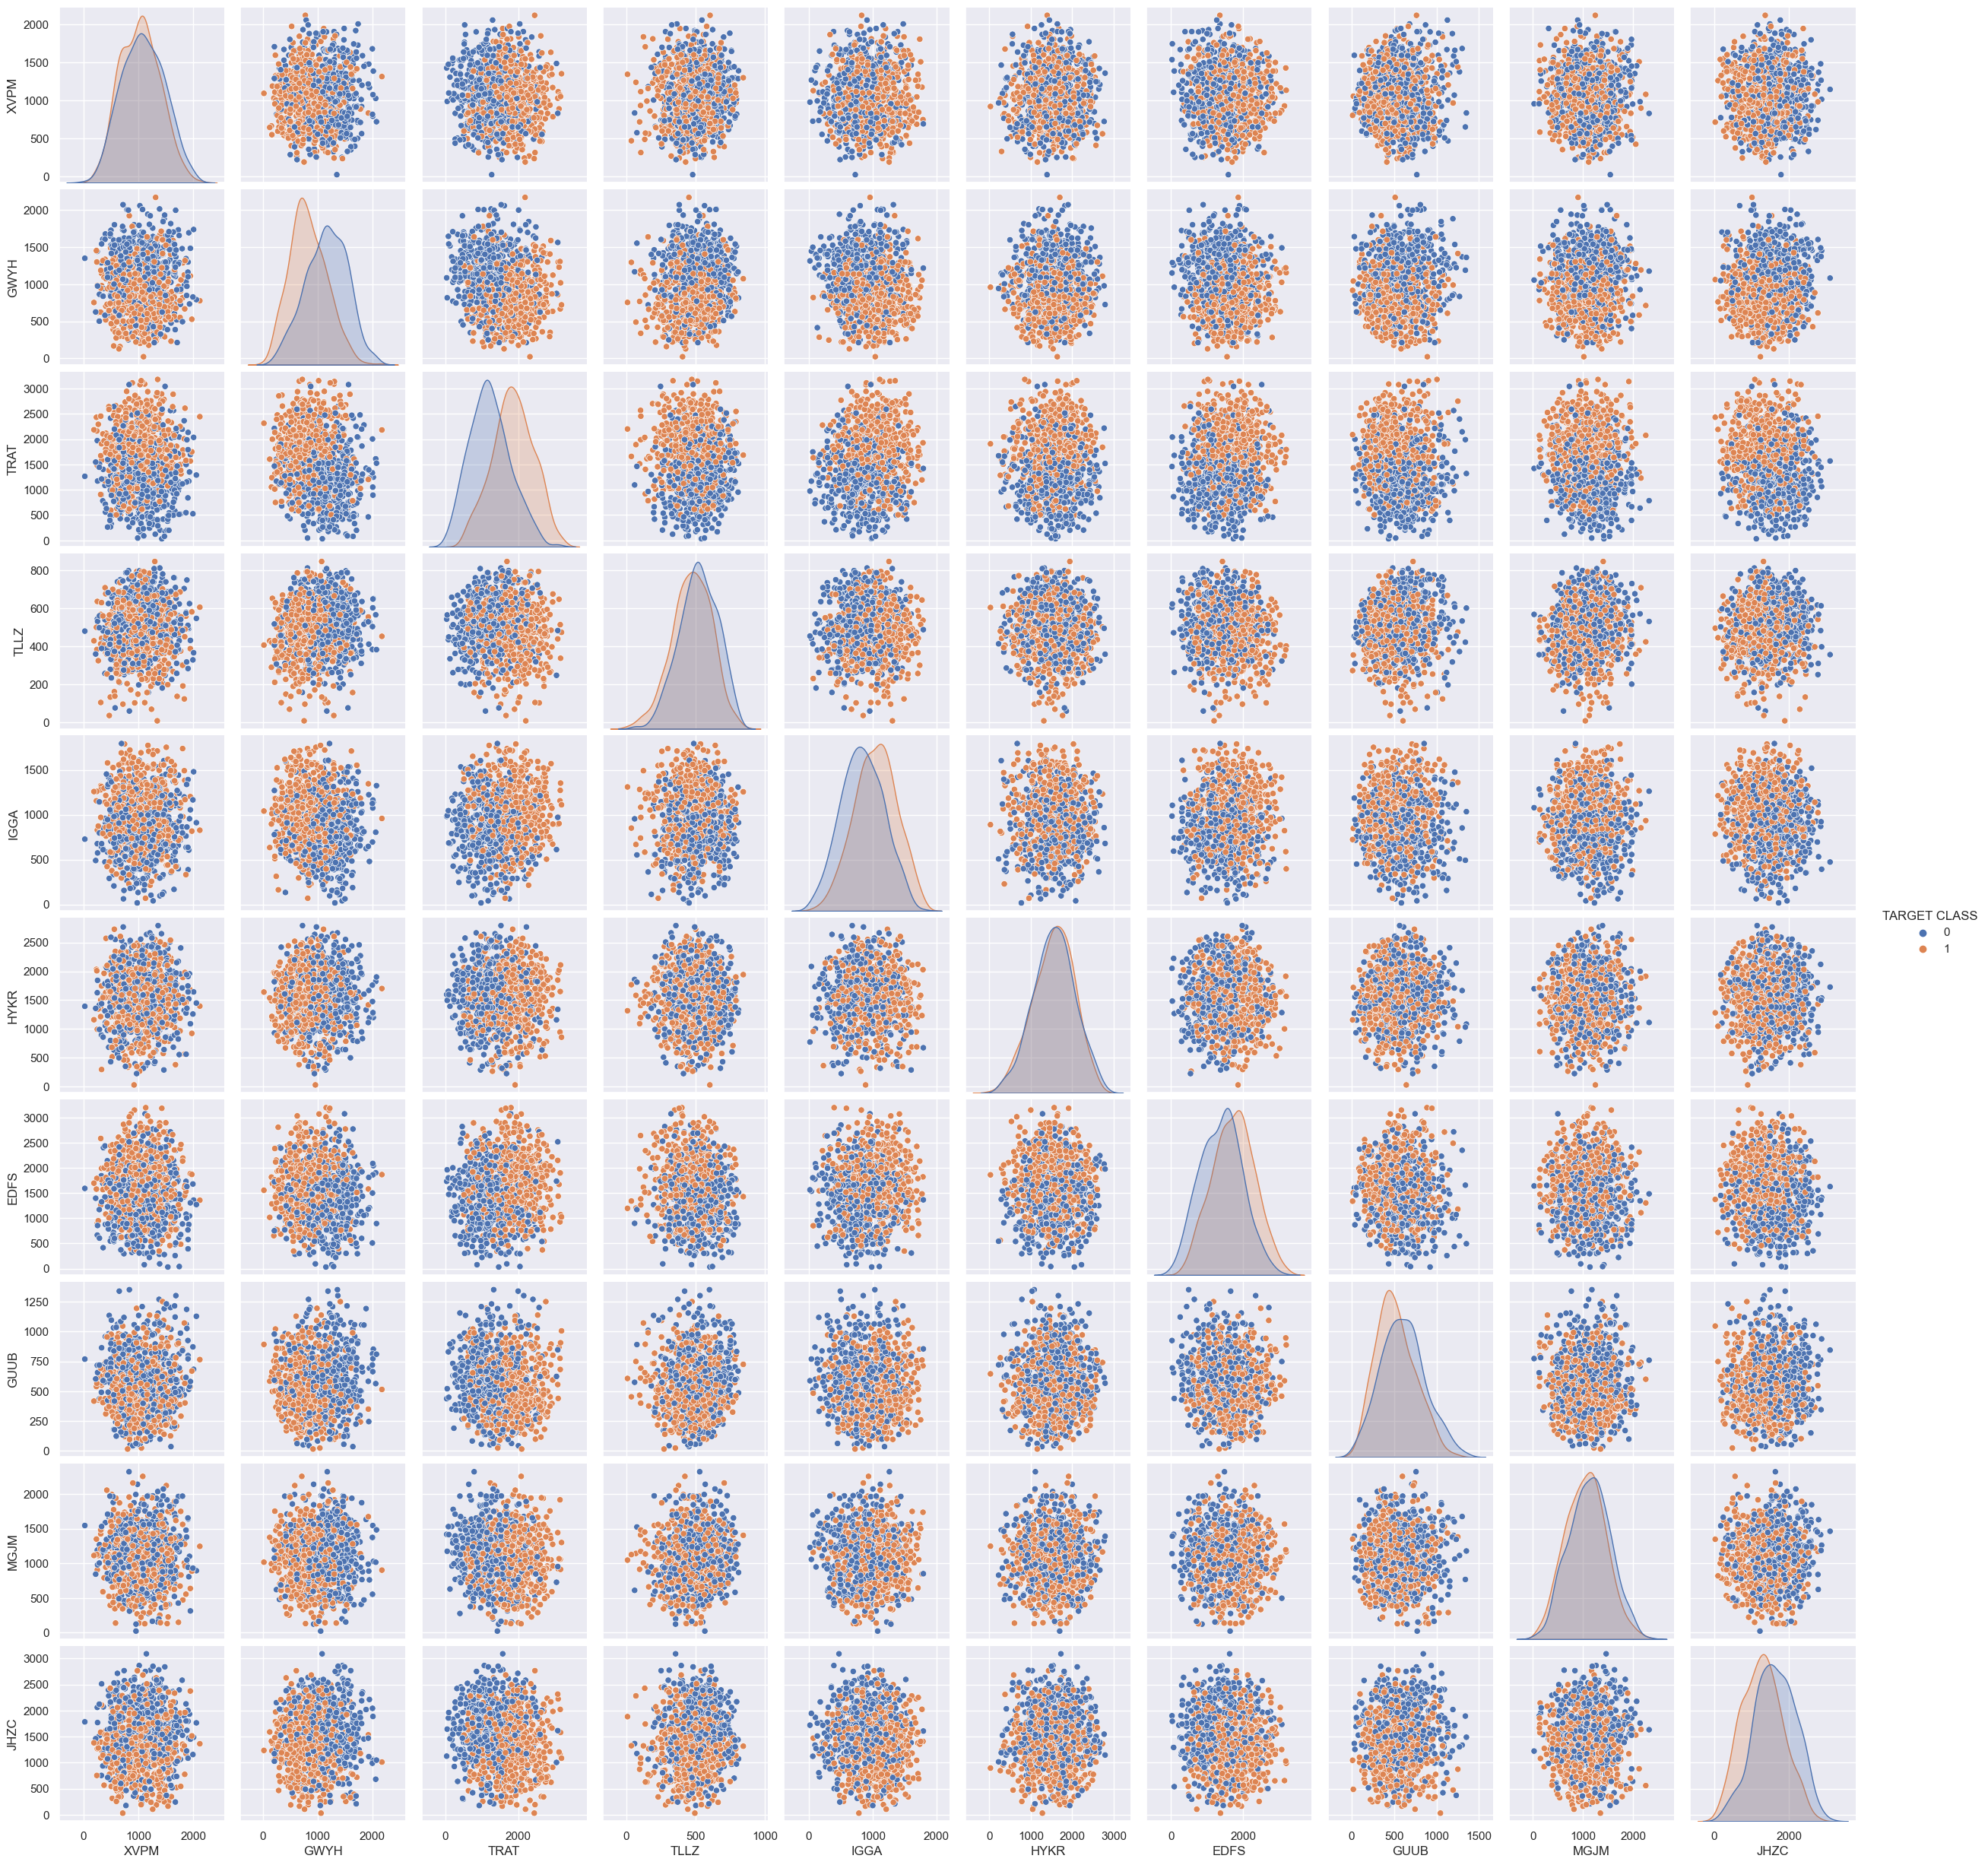

In [13]:
sns.pairplot(df,hue='TARGET CLASS')

# Standardize the Variables

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

Using the .transform() method to transform the features to a scaled version.

In [17]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

Converting the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.

In [19]:
scaled_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
scaled_feat.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

# Train Test Split


In [21]:
from sklearn.model_selection import train_test_split
scaled_feat.columns

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC'],
      dtype='object')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['TARGET CLASS'], test_size=0.3)

# Using KNN


In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)

In [28]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations

In [29]:
pre=knn.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(confusion_matrix(y_test,pre))

[[115  49]
 [ 32 104]]


In [32]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       164
           1       0.68      0.76      0.72       136

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.74      0.73      0.73       300



# Choosing a K Value


In [42]:
error_rate=[]

for i in range(1,41):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

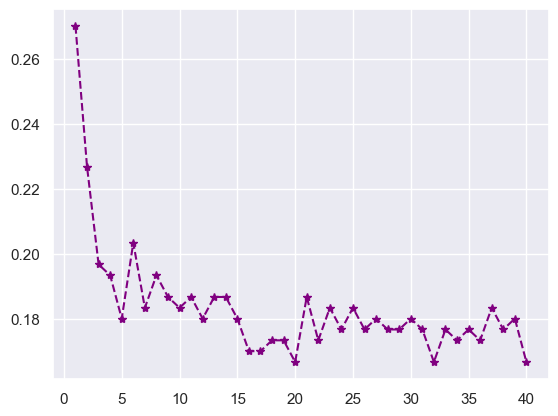

In [43]:
plt.plot(range(1,41),error_rate,linestyle='--',marker='*',color='purple')

## Retrain with new K Value


In [51]:
knn=KNeighborsClassifier(n_neighbors=32)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix
print('WITH K=32','\n')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

WITH K=32 

[[132  32]
 [ 18 118]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       164
           1       0.79      0.87      0.83       136

    accuracy                           0.83       300
   macro avg       0.83      0.84      0.83       300
weighted avg       0.84      0.83      0.83       300

